## XGBoost练习3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from jupyterthemes import jtplot
jtplot.style("gruvboxl")

mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, roc_auc_score, classification_report
from sklearn.datasets import load_iris, load_digits, fetch_california_housing

import xgboost

### 二分类问题

In [2]:
# 手写字体集0和1二分类问题
digits = load_digits(n_class=2)
X = digits.data
y = digits.target
kf = KFold(n_splits=2, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X=X):
    x_train, x_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    model = xgboost.XGBClassifier(n_jobs=1)
    model.fit(X=x_train, y=y_train)
    y_pred = model.predict(X=x_test)
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    print(roc_auc_score(y_true=y_test, y_score=y_pred))

[[88  0]
 [ 3 89]]
0.9836956521739131
[[90  0]
 [ 2 88]]
0.9888888888888889


## 多分类问题

In [3]:
# 鸢尾花多分类问题
iris = load_iris()
data = iris.data
target = iris.target
kf = KFold(n_splits=2, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X=data):
    x_train, x_test, y_train, y_test = data[train_index], data[test_index], target[train_index], target[test_index]
    model = xgboost.XGBClassifier(n_jobs=1)
    model.fit(X=x_train, y=y_train)
    y_pred = model.predict(X=x_test)
    print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.88      0.96      0.92        24
           2       0.96      0.89      0.92        27

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.86      0.96      0.91        26
           2       0.95      0.83      0.88        23

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75



### 回归问题

0.23672122449272887
0.2383194343975118


Text(0.5, 1.0, '加洲房价预测')

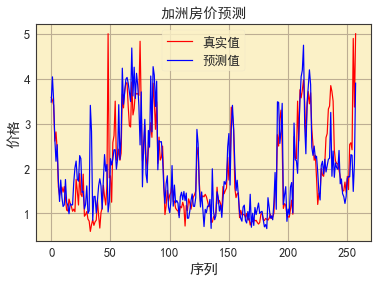

In [4]:
# 加洲房价回归问题
housing_price = fetch_california_housing(data_home="dataset/housing_price")
data = housing_price.data
target = housing_price.target
kf = KFold(n_splits=2, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X=data):
    x_train, x_test, y_train, y_test = data[train_index], data[test_index], target[train_index], target[test_index]
    model = xgboost.XGBRegressor(n_jobs=1)
    model.fit(X=x_train, y=y_train)
    y_pred = model.predict(X=x_test)
    print(mean_squared_error(y_true=y_test, y_pred=y_pred))

plt.plot(y_test[0:len(y_test) // 40], color="red", label="真实值")
plt.plot(y_pred[0:len(y_pred) // 40], color="blue", label="预测值")

plt.legend()

plt.xlabel("序列")
plt.ylabel("价格")
plt.title("加洲房价预测")

## 网格搜索参数

In [5]:
housing_price = fetch_california_housing(data_home="dataset/housing_price")
data = housing_price.data
target = housing_price.target

model = xgboost.XGBRegressor(n_jobs=1)
clf = GridSearchCV(model, {"max_depth": [2, 4, 6], 'n_estimators': [50, 100, 200]}, verbose=1)
clf.fit(X=data, y=target)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.6891743685794811
{'max_depth': 4, 'n_estimators': 50}


### 早期停止early_stopping

In [6]:
housing_price = fetch_california_housing(data_home="dataset/housing_price", download_if_missing=True)
data = housing_price.data
target = housing_price.target
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=1)

model = xgboost.XGBRegressor(n_estimators=100, n_jobs=1, max_depth=1, early_stopping_rounds=5, eval_metric="rmse")
model.fit(X=x_train, y=y_train, eval_set=[(x_test, y_test)])


[0]	validation_0-rmse:1.50513
[1]	validation_0-rmse:1.24200
[2]	validation_0-rmse:1.07878
[3]	validation_0-rmse:0.97998
[4]	validation_0-rmse:0.92344
[5]	validation_0-rmse:0.88651
[6]	validation_0-rmse:0.86050
[7]	validation_0-rmse:0.84070
[8]	validation_0-rmse:0.82532
[9]	validation_0-rmse:0.81073
[10]	validation_0-rmse:0.80079
[11]	validation_0-rmse:0.79081
[12]	validation_0-rmse:0.78269
[13]	validation_0-rmse:0.77344
[14]	validation_0-rmse:0.76698
[15]	validation_0-rmse:0.76096
[16]	validation_0-rmse:0.75494
[17]	validation_0-rmse:0.74927
[18]	validation_0-rmse:0.74375
[19]	validation_0-rmse:0.73878
[20]	validation_0-rmse:0.73203
[21]	validation_0-rmse:0.72747
[22]	validation_0-rmse:0.72394
[23]	validation_0-rmse:0.71953
[24]	validation_0-rmse:0.71476
[25]	validation_0-rmse:0.71087
[26]	validation_0-rmse:0.70774
[27]	validation_0-rmse:0.70307
[28]	validation_0-rmse:0.70034
[29]	validation_0-rmse:0.69761
[30]	validation_0-rmse:0.69445
[31]	validation_0-rmse:0.69137
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=5, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)